## 12-2-1 퍼진 정도 알아보기

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import scipy as sp

In [4]:
df = pd.read_csv("apartments.csv" )                ## csv 파일을 읽는다 

In [5]:
df.head()

,Unnamed: 0,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,0,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201902,1~10,162000,2,1982,개포로
1,1,서울특별시 강남구 개포동,187,187,0,개포주공 5단지,74.25,201902,11~20,153500,1,1983,삼성로4길
2,2,서울특별시 강남구 개포동,185,185,0,개포주공 6단지,60.13,201902,11~20,130000,5,1983,개포로
3,3,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,60.76,201902,11~20,130500,9,1983,개포로
4,4,서울특별시 강남구 개포동,185,185,0,개포주공 7단지,53.46,201902,21~28,114000,14,1983,개포로


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.shape

(1164, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 12 columns):
시군구         1164 non-null object
번지          1164 non-null object
본번          1164 non-null int64
부번          1164 non-null int64
단지명         1164 non-null object
전용면적(㎡)     1164 non-null float64
계약년월        1164 non-null int64
계약일         1164 non-null object
거래금액(만원)    1164 non-null int64
층           1164 non-null int64
건축년도        1164 non-null int64
도로명         1164 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 109.2+ KB


In [9]:
df[['거래금액(만원)']].describe()

,거래금액(만원)
count,1164.000000
mean,58814.713058
std,46207.115723
min,7700.000000
25%,32000.000000
50%,45850.000000
75%,69000.000000
max,630000.000000


In [10]:
df[['거래금액(만원)']].var()

거래금액(만원)    2.135098e+09
dtype: float64

In [11]:
df[['거래금액(만원)']].std()

거래금액(만원)    46207.115723
dtype: float64

In [12]:
df[['거래금액(만원)']].min(), df[['거래금액(만원)']].max()

(거래금액(만원)    7700
 dtype: int64, 거래금액(만원)    630000
 dtype: int64)

In [13]:
df.nsmallest(3, ['거래금액(만원)'])               ## 거래금액이 작은 것을 조회한다 

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
312,서울특별시 구로구 오류동,34-13,34,13,썬앤빌,14.064,201902,1~10,7700,7,2014,경인로19가길
1120,서울특별시 중랑구 망우동,506-8,506,8,EG Soul Leader,13.420,201902,21~28,8900,6,2012,상봉로
265,서울특별시 구로구 구로동,797-19,797,19,(797-19),35.580,201902,21~28,9000,1,1995,디지털로27라길


In [14]:
df.nlargest(3, ['거래금액(만원)'])            ## 큰 거래금액을 조회한다 

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
1007,서울특별시 용산구 한남동,810,810,0,한남더힐,240.23,201902,1~10,630000,-2,2011,독서당로
740,서울특별시 성동구 성수동1가,685-696,685,696,갤러리아 포레,195.20,201902,21~28,319000,13,2011,서울숲2길
9,서울특별시 강남구 대치동,670,670,0,동부센트레빌,161.47,201902,11~20,310000,22,2005,선릉로


In [15]:
df[['거래금액(만원)']].quantile([.25, .5, .75])

,거래금액(만원)
0.25,32000.0
0.50,45850.0
0.75,69000.0


In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [18]:
import sys
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [19]:
## 맥에서 폰트 확인하기

In [20]:
if sys.platform == 'darwin' : 
    font = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

In [21]:
font

NameError: name 'font' is not defined

In [22]:
if sys.platform == 'darwin' : 
    path = '/System/Library/Assets/com_apple_MobileAsset_Font4/6312deadbf7f783147b59e13758d5a78918faab7.asset/AssetData/NanumGothic.ttc'
    font_name = fm.FontProperties(fname=path, size=50).get_name()
    print(font_name)
    plt.rc('font', family=font_name)

else :
    plt.rc('font', family='Malgun Gothic')

In [23]:
import seaborn as sns

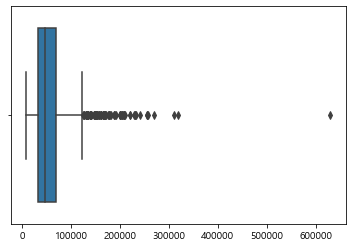

In [24]:
sns.boxplot(x=df[['거래금액(만원)']])                     ## 박스 그래프를 그린다 

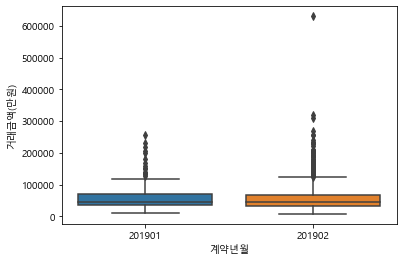

In [25]:
sns.boxplot( x='계약년월', y='거래금액(만원)', data=df)        ## 박스그래프를 두 개로 분리한다 

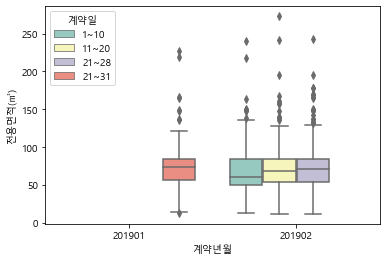

In [26]:
sns.boxplot(x='계약년월', y='전용면적(㎡)', hue="계약일",data=df, palette="Set3")    ## 박스 그래프의 내용을 hue를 추가해서 세분화한다 

### 왜도와 첨도

In [27]:
df[['거래금액(만원)']].skew()                              ##  평균에서 치우친 정도를 구한다 

거래금액(만원)    3.323032
dtype: float64

In [28]:
df[['거래금액(만원)']].kurtosis()                         ## 중앙값에 모인 정도를 구한다 

거래금액(만원)    23.694861
dtype: float64

## 왜도와 평균 비교하기

In [29]:
x = df['거래금액(만원)']
sample_mean = int(x.mean())
sample_skew = df[['거래금액(만원)']].skew()[0]

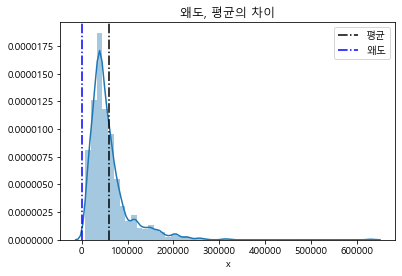

In [30]:
sns.distplot(x)                                                   ## 선그래프와 히스토그램을 그린다. 
plt.axvline(sample_mean, c='k', ls="-.", label="평균")            ## 평균과 왜도를 직선으로 그린다. 
plt.axvline(sample_skew , c='b', ls="-.", label="왜도")

plt.title("왜도, 평균의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

In [31]:
x = np.log10(df['거래금액(만원)'])
sample_mean = x.mean()
sample_skew = sp.stats.skew(df[['거래금액(만원)']])[0]

In [32]:
sample_mean,sample_skew

(4.673121395132599, 3.318747789590563)

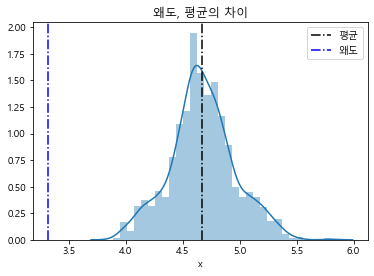

In [33]:
sns.distplot(x)
plt.axvline(sample_mean, c='k', ls="-.", label="평균")
plt.axvline(sample_skew , c='b', ls="-.", label="왜도")

plt.title("왜도, 평균의 차이")
plt.xlabel("x")
plt.legend()
plt.show()